In [1]:
dir_root = '.'
# If using google colab
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive/')
    dir_root = '/content/drive/MyDrive/Colab Notebooks/ESE546/hw3'

print(dir_root)

.


In [2]:
import requests

# Load the text from a local file
def load_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# Load the text from a URL
def load_text_from_url(url):
    response = requests.get(url)
    text = response.text.replace('\r\n', '\n')  # Normalize line endings
    return text

# Count unique characters in the text
def count_unique_chars(text):
    unique_chars = set(text)
    # Num of unique characters
    vocab_size = len(unique_chars)
    return vocab_size, unique_chars

# List of file paths or URLs
local_file_1 = 'pg100.txt'
local_file_2 = 'pg2600.txt'
local_file_3 = 'pg766.txt'
url_file_1 = 'https://www.gutenberg.org/cache/epub/100/pg100.txt'
url_file_2 = 'https://www.gutenberg.org/cache/epub/2600/pg2600.txt'
url_file_3 = 'https://www.gutenberg.org/cache/epub/766/pg766.txt'

if 'google.colab' in str(get_ipython()):
    file_path_list = [url_file_1, url_file_2, url_file_3]
else:
    file_path_list = [local_file_1, local_file_2, local_file_3]
text_list = []
vocab_size_list = []
unique_chars_list = []

for file_path in file_path_list:
    if file_path.startswith('http'):
        print(f'Loading text from URL: {file_path}')
        text = load_text_from_url(file_path)
    else:
        print(f'Loading text from file: {file_path}')
        text = load_text_from_file(file_path)
    vocab_size, unique_chars = count_unique_chars(text)
    text_list.append(text)
    vocab_size_list.append(vocab_size)
    unique_chars_list.append(unique_chars)

print(f'Vocabulary size for each text: {vocab_size_list}')
print(f'Unique characters for each text: {unique_chars_list}')

Loading text from file: pg100.txt
Loading text from file: pg2600.txt
Loading text from file: pg766.txt
Vocabulary size for each text: [107, 112, 90]
Unique characters for each text: [{'D', 'À', "'", 'B', 'i', 'Q', 'f', '”', 'M', '6', 'N', '5', 'u', '2', 'é', 'P', 'A', '4', '_', 'ê', 'b', '\ufeff', '…', 'ë', 't', 'î', 'c', 'C', 'j', '/', 'à', 'k', 'e', '-', 'X', 'E', 'I', 'g', 'W', 'd', 'O', '$', '%', 'Ç', 'Y', '9', 'x', 'r', '8', '•', '\n', '&', 'y', 'w', 'v', 'â', '[', 'p', '0', 'Z', 'J', ':', ']', '*', 'F', 'R', 'q', '?', 'è', 'L', '#', '!', 'a', '“', '—', ';', '™', 'S', ' ', '.', 'G', 'n', '’', 'É', 'U', '7', 'z', 'l', ')', 'æ', '(', 'V', ',', '‘', 'h', 'œ', 'o', 'm', 'ç', 'T', 'K', 'H', 's', '\t', '3', '1', 'Æ'}, {'D', 'À', 'B', 'i', 'Q', 'f', '”', 'M', '6', 'N', '5', 'u', '2', 'é', 'P', 'á', 'A', '4', 'ê', 'b', '\ufeff', 'ë', 't', 'î', 'c', 'ú', 'C', 'j', '/', 'à', 'k', 'e', '-', 'X', 'E', 'I', 'í', 'g', '=', 'W', 'd', 'O', '$', 'ï', '%', 'Y', '9', 'x', 'r', '8', '•', '\n', 'ä', '

In [3]:
print(text_list[0][:100])
print(text_list[1][:100])
print(text_list[2][:100])

The Project Gutenberg eBook of The Complete Works of William Shakespeare
    
This ebook is for the
﻿The Project Gutenberg eBook of War and Peace
    
This ebook is for the use of anyone anywhere in t
﻿The Project Gutenberg eBook of David Copperfield
    
This ebook is for the use of anyone anywhere 


In [4]:
# # Compare unique characters from local and URL text files
# local_file_path = 'pg2600.txt'
# url_file_path = 'https://www.gutenberg.org/cache/epub/2600/pg2600.txt'
#
# local_text = load_text_from_file(local_file_path)
# local_vocab_size, local_unique_chars = count_unique_chars(local_text)
# url_text = load_text_from_url(url_file_path)
# url_vocab_size, url_unique_chars = count_unique_chars(url_text)
#
# # Find the extra character(s)
# extra_chars_in_url = url_unique_chars - local_unique_chars
# extra_chars_in_local = local_unique_chars - url_unique_chars
# print(f'Extra characters in URL text: {extra_chars_in_url}')
# print(f'Extra characters in local text: {extra_chars_in_local}')

In [5]:
# Create a dictionary to map characters to indices and vice-versa
def create_char_mappings(unique_chars):
    char_to_index = {char: idx for idx, char in enumerate(unique_chars)}
    index_to_char = {idx: char for idx, char in enumerate(unique_chars)}
    return char_to_index, index_to_char

vocab_size, unique_chars = vocab_size_list[0], unique_chars_list[0]
char_to_index, index_to_char = create_char_mappings(unique_chars)

print(f"Character to index mapping for first text: {char_to_index}")
print(f"Index to character mapping for first text: {index_to_char}")

Character to index mapping for first text: {'D': 0, 'À': 1, "'": 2, 'B': 3, 'i': 4, 'Q': 5, 'f': 6, '”': 7, 'M': 8, '6': 9, 'N': 10, '5': 11, 'u': 12, '2': 13, 'é': 14, 'P': 15, 'A': 16, '4': 17, '_': 18, 'ê': 19, 'b': 20, '\ufeff': 21, '…': 22, 'ë': 23, 't': 24, 'î': 25, 'c': 26, 'C': 27, 'j': 28, '/': 29, 'à': 30, 'k': 31, 'e': 32, '-': 33, 'X': 34, 'E': 35, 'I': 36, 'g': 37, 'W': 38, 'd': 39, 'O': 40, '$': 41, '%': 42, 'Ç': 43, 'Y': 44, '9': 45, 'x': 46, 'r': 47, '8': 48, '•': 49, '\n': 50, '&': 51, 'y': 52, 'w': 53, 'v': 54, 'â': 55, '[': 56, 'p': 57, '0': 58, 'Z': 59, 'J': 60, ':': 61, ']': 62, '*': 63, 'F': 64, 'R': 65, 'q': 66, '?': 67, 'è': 68, 'L': 69, '#': 70, '!': 71, 'a': 72, '“': 73, '—': 74, ';': 75, '™': 76, 'S': 77, ' ': 78, '.': 79, 'G': 80, 'n': 81, '’': 82, 'É': 83, 'U': 84, '7': 85, 'z': 86, 'l': 87, ')': 88, 'æ': 89, '(': 90, 'V': 91, ',': 92, '‘': 93, 'h': 94, 'œ': 95, 'o': 96, 'm': 97, 'ç': 98, 'T': 99, 'K': 100, 'H': 101, 's': 102, '\t': 103, '3': 104, '1': 105,

In [6]:
import numpy as np

# One-hot encode a character based on the character index
def one_hot_encode(char, char_to_index, vocab_size):
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[char_to_index[char]] = 1
    return one_hot_vector

test_char_a = 'a'
one_hot_vector = one_hot_encode(test_char_a, char_to_index, vocab_size)
print(f"One-hot encoding for '{test_char_a}': {one_hot_vector}")

One-hot encoding for 'a': [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
# Sample a short portion from the first book
text = text_list[0][60000:60500]
print(text)

 ill:
Some in their hawks and hounds, some in their horse.
And every humour hath his adjunct pleasure,
Wherein it finds a joy above the rest,
But these particulars are not my measure,
All these I better in one general best.
Thy love is better than high birth to me,
Richer than wealth, prouder than garments’ costs,
Of more delight than hawks and horses be:
And having thee, of all men’s pride I boast.
  Wretched in this alone, that thou mayst take,
  All this away, and me most wretched make.


   


In [8]:
from tqdm import tqdm

# Generate sequences of 32 characters and the next character as the target
def generate_sequences(text, char_to_index, sequence_length=32, stride=1):
    input_sequences = []
    target_characters = []

    # for i in range(0, len(text) - sequence_length, stride):
    for i in tqdm(range(0, len(text) - sequence_length - 1, stride), desc="Generating sequences"):
        input_seq = text[i:i+sequence_length]
        # Target/next character
        target_char = text[i+sequence_length]

        # Convert input sequence to one-hot encoded vectors
        input_seq_encoded = [one_hot_encode(c, char_to_index, len(char_to_index)) for c in input_seq]
        input_sequences.append(input_seq_encoded)

        # One-hot encoding for the target character
        target_char_encoded = one_hot_encode(target_char, char_to_index, len(char_to_index))
        target_characters.append(target_char_encoded)

    return np.array(input_sequences), np.array(target_characters)


In [9]:
input_sequences, target_characters = generate_sequences(text, char_to_index)
print(f"Input sequences shape: {input_sequences.shape}")
print(f"Target characters shape: {target_characters.shape}")
print(input_sequences[2])
print(target_characters[35])

Generating sequences: 100%|██████████| 467/467 [00:00<00:00, 23310.29it/s]

Input sequences shape: (467, 32, 107)
Target characters shape: (467, 107)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split
from tqdm import tqdm

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Device: {device}")

class CharRNN(nn.Module):
    def __init__(self, vocab_size, input_size, hidden_size, dropout=0.2):
        super(CharRNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.vocab_size = vocab_size
        
        self.rnn = nn.RNN(self.input_size, self.hidden_size, nonlinearity='tanh', batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(self.hidden_size, self.vocab_size)

    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = self.dropout(out)
        out = self.fc(out[:, -1, :])
        # return F.log_softmax(out, dim=1), hidden
        return out, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(1, batch_size, self.hidden_size).to(device)

def repackage_hidden(hidden_layer):
    # Detach hidden states from their history
    if isinstance(hidden_layer, torch.Tensor):
        return hidden_layer.detach()
    else:
        return tuple(repackage_hidden(v) for v in hidden_layer)


Device: cuda


In [11]:
USE_ALL_BOOKS = False

if 'google.colab' in str(get_ipython()):
    USE_ALL_BOOKS = True

sequence_length = 32

if USE_ALL_BOOKS:
    # Load text and prepare data
    all_texts = ''.join(text_list)  # Concatenate all texts
    vocab_size, unique_chars = count_unique_chars(all_texts)
    char_to_index, index_to_char = create_char_mappings(unique_chars)
    print(f"Vocabulary size: {vocab_size}")
    
    # Generate sequences
    input_sequences, target_characters = generate_sequences(all_texts, char_to_index, sequence_length=sequence_length, stride=24)
    input_sequences = torch.tensor(input_sequences, dtype=torch.float32)
    target_characters = torch.tensor(target_characters, dtype=torch.long)
    
    input_sequences = input_sequences.to(device)
    target_characters = target_characters.to(device)
    
    # Create TensorDataset and DataLoader
    dataset = TensorDataset(input_sequences, target_characters)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    
    print("Input sequences shape:", input_sequences.shape)
    print("Target characters shape:", target_characters.shape)
else:
    text = text_list[0]
    vocab_size, unique_chars = vocab_size_list[0], unique_chars_list[0]
    char_to_index, index_to_char = create_char_mappings(unique_chars)
    print(f"Vocabulary size: {vocab_size}")
    
    input_sequences, target_characters = generate_sequences(text, char_to_index, sequence_length=sequence_length, stride=63)
    input_sequences = torch.tensor(input_sequences, dtype=torch.float32)
    target_characters = torch.tensor(target_characters, dtype=torch.long)
    
    input_sequences = input_sequences.to(device)
    target_characters = target_characters.to(device)
    
    dataset = TensorDataset(input_sequences, target_characters)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    
    print("Input sequences shape:", input_sequences.shape)
    print("Target characters shape:", target_characters.shape)


Vocabulary size: 107


Generating sequences: 100%|██████████| 85376/85376 [00:02<00:00, 29192.52it/s]


Input sequences shape: torch.Size([85376, 32, 107])
Target characters shape: torch.Size([85376, 107])


In [12]:
def escape_sequence(seq):
    return seq.replace(' ', '\\s').replace('\n', '\\n')

# Randomly pick a sequence and target character
# convert them back to characters
# and check if the conversion is correct
sequence_idx = np.random.randint(0, len(input_sequences))
sequence = input_sequences[sequence_idx]
target = target_characters[sequence_idx]

sequence_indices = torch.argmax(sequence, dim=1).cpu().numpy()
sequence_chars = [index_to_char[idx] for idx in sequence_indices]

target_char = index_to_char[torch.argmax(target).item()]

sequence_str = ''.join(sequence_chars)
escaped_sequence_str = escape_sequence(sequence_str)

print(f"Sequence: \n{''.join(escaped_sequence_str)}")
print(f"Target character: {target_char}")

# Also find the sequence in the original txt ebooks
# and print the entire sequence with the next target character
sequence_str = ''.join(sequence_chars)
for book_idx, text in enumerate(text_list):
    start_indices = [i for i in range(len(text)) if text.startswith(sequence_str, i)]
    for start_idx in start_indices:
        # Make sure the sequence is not at the end of the text
        if start_idx + len(sequence_str) + 1 < len(text):
            # Extract the sequence and the next character
            excerpt = text[start_idx:start_idx + len(sequence_str) + 1]
            escaped_excerpt = escape_sequence(excerpt)
            print(f"Find the sequence in book {book_idx + 1}, original complete sequence:")
            print(f"{escaped_excerpt}")

Sequence: 
ces\sand\smishaps.\nHere\slurks\sno\st
Target character: r
Find the sequence in book 1, original complete sequence:
ces\sand\smishaps.\nHere\slurks\sno\str


In [13]:
from IPython.display import clear_output
import torch.optim.lr_scheduler as lr_scheduler

# Hyperparameters
hidden_size = 256
learning_rate = 0.001
num_epochs = 100 if 'google.colab' in str(get_ipython()) else 20
batch_size = 64
dropout = 0.2

from torch.utils.data import DataLoader, RandomSampler, BatchSampler

# Create samplers that allow replacement to ensure each batch has the same size
train_sampler = RandomSampler(train_dataset, replacement=True, num_samples=len(train_dataset))
val_sampler = RandomSampler(val_dataset, replacement=True, num_samples=len(val_dataset))

# Create batch samplers with the same batch size and drop the last batch
train_batch_sampler = BatchSampler(train_sampler, batch_size=batch_size, drop_last=True)
val_batch_sampler = BatchSampler(val_sampler, batch_size=batch_size, drop_last=True)

# Create DataLoader instances
train_loader = DataLoader(dataset=train_dataset, batch_sampler=train_batch_sampler)
val_loader = DataLoader(dataset=val_dataset, batch_sampler=val_batch_sampler)

In [16]:
# Initialize model, loss function, and optimizer
model = CharRNN(vocab_size, sequence_length, hidden_size, dropout).to(device)
# criterion = nn.NLLLoss().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.95)  # Adjust gamma as needed

training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []
update_counts = []
update_cnt = 0

# Training loop
for epoch in tqdm(range(num_epochs), desc="Training"):
    total_loss = 0
    hidden = model.init_hidden(batch_size).to(device)
    for input_seqs, target_seqs in train_loader:
        model.train()
        batch_size = input_seqs.size(0)
        input_seqs, target_seqs = input_seqs.to(device), target_seqs.to(device)
        hidden = repackage_hidden(hidden)
        optimizer.zero_grad()
        output, hidden = model(input_seqs.transpose(1, 2), hidden)
        loss = criterion(output, torch.argmax(target_seqs, dim=1))
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        total_loss += loss.item()

        # Record training loss
        training_losses.append(loss.item())
        update_counts.append(update_cnt)

        # Calculate accuracy
        # print(output.shape)
        # print(target_seqs.shape)
        training_accuracy = (torch.argmax(output, dim=1) == torch.argmax(target_seqs, dim=1)).float().mean().item()
        training_accuracies.append(training_accuracy)

        if update_cnt % 1000 == 0:
            # Validation
            model.eval()
            with torch.no_grad():
                val_loss = 0
                correct_predictions = 0
                total_predictions = 0
                for input_seqs, target_seqs in val_loader:
                    batch_size = input_seqs.size(0)
                    input_seqs, target_seqs = input_seqs.to(device), target_seqs.to(device)
                    hidden = model.init_hidden(batch_size).to(device)
                    hidden = repackage_hidden(hidden)
                    output, hidden = model(input_seqs.transpose(1, 2), hidden)
                    val_loss += criterion(output, torch.argmax(target_seqs, dim=1)).item()
                    
                    correct_predictions += (torch.argmax(output, dim=1) == torch.argmax(target_seqs, dim=1)).sum().item()
                    total_predictions += target_seqs.size(0)

            avg_val_loss = val_loss / len(val_loader)
            validation_losses.append(avg_val_loss)
            validation_accuracy = correct_predictions / total_predictions
            validation_accuracies.append(validation_accuracy)
        
            print(f'Update {update_cnt}, Training Loss: {total_loss / 1000:.4f}, Training Accuracy: {training_accuracy:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {validation_accuracy:.4f}')

        update_cnt += 1
    
    scheduler.step()
    

Training:   0%|          | 0/20 [00:00<?, ?it/s]

Update 0, Training Loss: 0.0047, Training Accuracy: 0.0000, Validation Loss: 4.6279, Validation Accuracy: 0.1582
Update 1000, Training Loss: 3.3981, Training Accuracy: 0.1562, Validation Loss: 3.3766, Validation Accuracy: 0.1544


Training:   5%|▌         | 1/20 [00:06<01:56,  6.14s/it]

Update 2000, Training Loss: 3.1665, Training Accuracy: 0.1719, Validation Loss: 3.3839, Validation Accuracy: 0.1570


Training:  10%|█         | 2/20 [00:11<01:39,  5.55s/it]

Update 3000, Training Loss: 2.9274, Training Accuracy: 0.1406, Validation Loss: 3.3949, Validation Accuracy: 0.1514


Training:  15%|█▌        | 3/20 [00:16<01:31,  5.38s/it]

Update 4000, Training Loss: 2.6868, Training Accuracy: 0.2031, Validation Loss: 3.3700, Validation Accuracy: 0.1544


Training:  20%|██        | 4/20 [00:21<01:23,  5.25s/it]

Update 5000, Training Loss: 2.4790, Training Accuracy: 0.2188, Validation Loss: 3.3664, Validation Accuracy: 0.1560


Training:  25%|██▌       | 5/20 [00:26<01:16,  5.09s/it]

Update 6000, Training Loss: 2.2415, Training Accuracy: 0.0625, Validation Loss: 3.3950, Validation Accuracy: 0.1540


Training:  30%|███       | 6/20 [00:31<01:09,  4.99s/it]

Update 7000, Training Loss: 2.0091, Training Accuracy: 0.0938, Validation Loss: 3.3706, Validation Accuracy: 0.1535


Training:  35%|███▌      | 7/20 [00:36<01:05,  5.00s/it]

Update 8000, Training Loss: 1.7915, Training Accuracy: 0.1562, Validation Loss: 3.3579, Validation Accuracy: 0.1565


Training:  40%|████      | 8/20 [00:41<01:00,  5.04s/it]

Update 9000, Training Loss: 1.5602, Training Accuracy: 0.0938, Validation Loss: 3.3637, Validation Accuracy: 0.1548


Training:  45%|████▌     | 9/20 [00:46<00:55,  5.05s/it]

Update 10000, Training Loss: 1.3388, Training Accuracy: 0.0625, Validation Loss: 3.3486, Validation Accuracy: 0.1580


Training:  50%|█████     | 10/20 [00:51<00:49,  4.97s/it]

Update 11000, Training Loss: 1.1102, Training Accuracy: 0.0938, Validation Loss: 3.3570, Validation Accuracy: 0.1554


Training:  55%|█████▌    | 11/20 [00:55<00:44,  4.94s/it]

Update 12000, Training Loss: 0.8892, Training Accuracy: 0.1406, Validation Loss: 3.3452, Validation Accuracy: 0.1597


Training:  60%|██████    | 12/20 [01:00<00:39,  4.89s/it]

Update 13000, Training Loss: 0.6603, Training Accuracy: 0.1562, Validation Loss: 3.3543, Validation Accuracy: 0.1531


Training:  65%|██████▌   | 13/20 [01:05<00:34,  4.87s/it]

Update 14000, Training Loss: 0.4326, Training Accuracy: 0.1562, Validation Loss: 3.3406, Validation Accuracy: 0.1566


Training:  70%|███████   | 14/20 [01:10<00:29,  4.85s/it]

Update 15000, Training Loss: 0.2131, Training Accuracy: 0.1875, Validation Loss: 3.3347, Validation Accuracy: 0.1578


Training:  75%|███████▌  | 15/20 [01:15<00:24,  4.98s/it]

Update 16000, Training Loss: 3.5452, Training Accuracy: 0.1875, Validation Loss: 3.2768, Validation Accuracy: 0.1772
Update 17000, Training Loss: 3.2345, Training Accuracy: 0.2188, Validation Loss: 3.0741, Validation Accuracy: 0.1969


Training:  80%|████████  | 16/20 [01:20<00:19,  4.92s/it]

Update 18000, Training Loss: 2.8339, Training Accuracy: 0.2031, Validation Loss: 2.8392, Validation Accuracy: 0.2454


Training:  85%|████████▌ | 17/20 [01:25<00:14,  4.89s/it]

Update 19000, Training Loss: 2.3699, Training Accuracy: 0.2031, Validation Loss: 2.7696, Validation Accuracy: 0.2463


Training:  90%|█████████ | 18/20 [01:30<00:09,  4.85s/it]

Update 20000, Training Loss: 2.4843, Training Accuracy: 0.2188, Validation Loss: 3.3883, Validation Accuracy: 0.1624


Training:  95%|█████████▌| 19/20 [01:34<00:04,  4.84s/it]

Update 21000, Training Loss: 2.1557, Training Accuracy: 0.2969, Validation Loss: 2.7379, Validation Accuracy: 0.2619


Training: 100%|██████████| 20/20 [01:39<00:00,  4.98s/it]


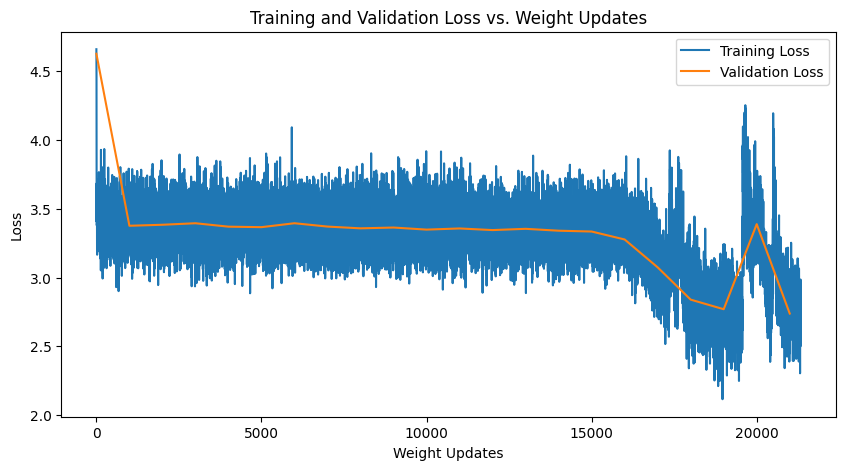

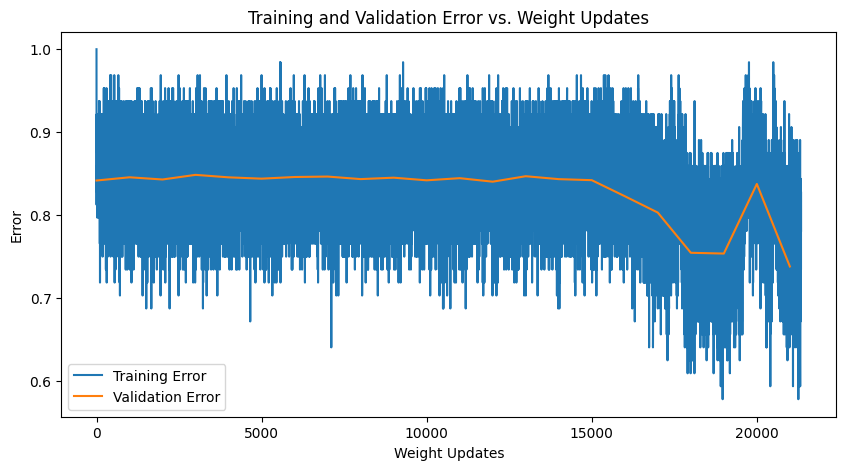

In [17]:
import matplotlib.pyplot as plt

# Calculate errors: error = 1 - accuracy
training_errors = [1 - acc for acc in training_accuracies]
validation_errors = [1 - acc for acc in validation_accuracies]

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(update_counts, training_losses, label='Training Loss')
plt.plot(range(0, len(validation_losses) * 1000, 1000), validation_losses, label='Validation Loss') 
plt.xlabel('Weight Updates')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Weight Updates')
plt.legend()

# Plot training and validation error
plt.figure(figsize=(10, 5))
plt.plot(update_counts, training_errors, label='Training Error')
plt.plot(range(0, len(validation_errors) * 1000, 1000), validation_errors, label='Validation Error')  
plt.xlabel('Weight Updates')
plt.ylabel('Error')
plt.title('Training and Validation Error vs. Weight Updates')
plt.legend()

plt.show()

In [18]:
# Save the model
model_path = f'{dir_root}/char_rnn_model.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to ./char_rnn_model.pth


In [19]:
# Load the model
model = CharRNN(vocab_size, sequence_length,hidden_size, dropout).to(device)
model.load_state_dict(torch.load(model_path))
model.eval()
print("Model loaded successfully")

Model loaded successfully


C:\Users\Bw Jiang\AppData\Local\Temp\ipykernel_28788\1949074436.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


In [20]:
def generate_text(model, start_text, char_to_index, index_to_char, max_length=1000, temperature=1.0):
    model.eval()
    with torch.no_grad():
        hidden = model.init_hidden(1).to(device)
        hidden = repackage_hidden(hidden)
        input_seq = start_text
        generated_text = start_text

        for i in range(max_length):
            input_seq_encoded = torch.tensor([one_hot_encode(c, char_to_index, len(char_to_index)) for c in input_seq], dtype=torch.float32).unsqueeze(0).to(device)
            output, hidden = model(input_seq_encoded.transpose(1, 2), hidden)
            output_dist = output.data.view(-1).div(temperature).exp()
            top_char = torch.multinomial(output_dist, 1)[0]
            
            # Ensure the predicted index is within the valid range
            if top_char.item() in index_to_char:
                predicted_char = index_to_char[top_char.item()]
            else:
                predicted_char = ''  # Handle out-of-range index by skipping or using a placeholder

            generated_text += predicted_char
            input_seq = input_seq[1:] + predicted_char

    return generated_text

In [21]:
# Generate text using the trained model
start_text = 'I never shall forget that night.'
generated_text = generate_text(model, start_text, char_to_index, index_to_char, max_length=100, temperature=0.3)
print(generated_text)

C:\Users\Bw Jiang\AppData\Local\Temp\ipykernel_28788\2158214449.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  input_seq_encoded = torch.tensor([one_hot_encode(c, char_to_index, len(char_to_index)) for c in input_seq], dtype=torch.float32).unsqueeze(0).to(device)


I never shall forget that night.

S.

I the the as the there the t s s the an t the atle s t po iller t atr t t the the thangore s m


In [24]:
## Self-Attention-Based NN for the same task

In [25]:
# Re-generation the dataset with sequence length 128
sequence_length = 128

if USE_ALL_BOOKS:
    input_sequences, target_characters = generate_sequences(all_texts, char_to_index, sequence_length=sequence_length, stride=24)
    input_sequences = torch.tensor(input_sequences, dtype=torch.float32)
    target_characters = torch.tensor(target_characters, dtype=torch.long)
    
    input_sequences = input_sequences.to(device)
    target_characters = target_characters.to(device)
    
    dataset = TensorDataset(input_sequences, target_characters)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    
    print("Input sequences shape:", input_sequences.shape)
    print("Target characters shape:", target_characters.shape)
else:
    input_sequences, target_characters = generate_sequences(text, char_to_index, sequence_length=sequence_length, stride=63)
    input_sequences = torch.tensor(input_sequences, dtype=torch.float32)
    target_characters = torch.tensor(target_characters, dtype=torch.long)
    
    input_sequences = input_sequences.to(device)
    target_characters = target_characters.to(device)
    
    dataset = TensorDataset(input_sequences, target_characters)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    
    print("Input sequences shape:", input_sequences.shape)
    print("Target characters shape:", target_characters.shape)



Generating sequences: 100%|██████████| 31015/31015 [00:07<00:00, 4169.58it/s]


Input sequences shape: torch.Size([31015, 128, 107])
Target characters shape: torch.Size([31015, 107])


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Transformer Model Definition
class TransformerModel(nn.Module):
    def __init__(self, ntokens, ninp, nhead, nhid, nlayers, dropout=0.5):
        super(TransformerModel, self).__init__()
        self.model_type = 'Transformer'
        self.src_mask = None
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=ninp, nhead=nhead, dim_feedforward=nhid, dropout=dropout),
            num_layers=nlayers
        )
        self.input_emb = nn.Embedding(ntokens, ninp)
        self.decoder = nn.Linear(ninp, ntokens)
        self.init_weights()
    
    def init_weights(self):
        initrange = 0.1
        nn.init.uniform_(self.input_emb.weight, -initrange, initrange)
        nn.init.zeros_(self.decoder.bias)
        nn.init.uniform_(self.decoder.weight, -initrange, initrange)

    def forward(self, src):
        src = self.input_emb(src) * np.sqrt(self.input_emb.embedding_dim)
        output = self.encoder(src)
        output = self.decoder(output)
        return output

# Prepare the dataset
def generate_sequences(text, char_to_index, sequence_length=128, stride=1):
    input_sequences = []
    target_characters = []

    for i in range(0, len(text) - sequence_length, stride):
        input_seq = text[i:i+sequence_length]
        target_char = text[i+sequence_length]
        input_seq_encoded = [char_to_index[c] for c in input_seq]
        input_sequences.append(input_seq_encoded)
        target_characters.append(char_to_index[target_char])

    return np.array(input_sequences), np.array(target_characters)

# Prepare data
sequence_length = 128
ntokens = len(char_to_index)

input_sequences, target_characters = generate_sequences(text_list[0], char_to_index)
input_sequences = torch.tensor(input_sequences, dtype=torch.long)
target_characters = torch.tensor(target_characters, dtype=torch.long)

dataset = TensorDataset(input_sequences, target_characters)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Model, Loss, Optimizer
model = TransformerModel(ntokens, 512, 8, 2048, 6).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output.view(-1, ntokens), targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, val_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            output = model(inputs)
            loss = criterion(output.view(-1, ntokens), targets)
            total_loss += loss.item()
    return total_loss / len(val_loader)

# Training and evaluation
num_epochs = 10
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    val_loss = evaluate(model, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Plotting
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Text Generation
def generate_text(model, start_text, char_to_index, index_to_char, max_length=1024):
    model.eval()
    with torch.no_grad():
        input_seq = torch.tensor([char_to_index[c] for c in start_text], dtype=torch.long).unsqueeze(0).to(device)
        generated_text = start_text

        for _ in range(max_length):
            output = model(input_seq)
            next_char_index = torch.argmax(output[:, -1, :]).item()
            next_char = index_to_char[next_char_index]
            generated_text += next_char
            input_seq = torch.cat((input_seq, torch.tensor([[next_char_index]], device=device)), dim=1)

    return generated_text

start_text = 'Once upon a time,'
generated_text = generate_text(model, start_text, char_to_index, index_to_char)
print(generated_text)

e:\ESE-5460\pythonProject\.venv\lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3